In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### IMPORTING DATA AND PLOTTING GRAPH FOR THE SAME

In [ ]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


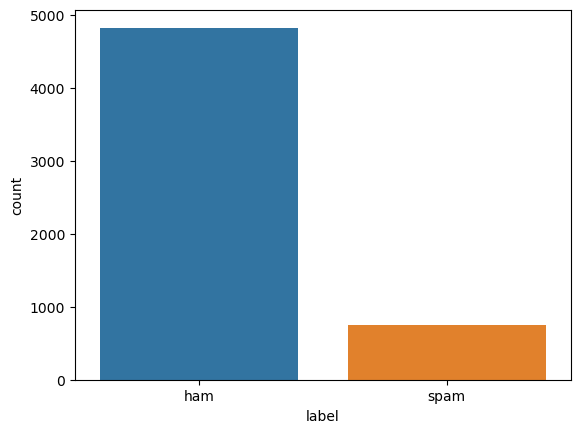

In [ ]:
sns.countplot(x=df['label'])
plt.show()

In [ ]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\newdata.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
1,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
2,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
3,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN


In [ ]:
duplicatedRow = df[df.duplicated()]
print("\nDataFrame with Duplicates:")
print(duplicatedRow[:5])

df_no_duplicates = df.drop_duplicates()
print("\nDataFrame without Duplicates:")
print(df_no_duplicates[:5])


DataFrame with Duplicates:
       v1                                                 v2 Unnamed: 2  \
172  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
180  spam  You are a winner U have been specially selecte...        NaN   
196  spam  No. 1 Nokia Tone 4 ur mob every week! Just txt...        NaN   
236  spam  Sunshine Quiz Wkly Q! Win a top Sony DVD playe...        NaN   
247  spam  Loan for any purpose ï¿½500 - ï¿½75,000. Homeo...        NaN   

    Unnamed: 3 Unnamed: 4  
172        NaN        NaN  
180        NaN        NaN  
196        NaN        NaN  
236        NaN        NaN  
247        NaN        NaN  

DataFrame without Duplicates:
     v1                                                 v2 Unnamed: 2  \
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
1  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
2  spam  WINNER!! As a valued network customer you have...        NaN   
3  spam  Had your mobile 11 mo

In [ ]:
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,label_enc
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
1,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,1
2,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,1
3,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,1
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN,1


In [ ]:
df.head().drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)

,label,Text,label_enc
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,spam,FreeMsg Hey there darling it's been 3 week's n...,1
2,spam,WINNER!! As a valued network customer you have...,1
3,spam,Had your mobile 11 months or more? U R entitle...,1
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1


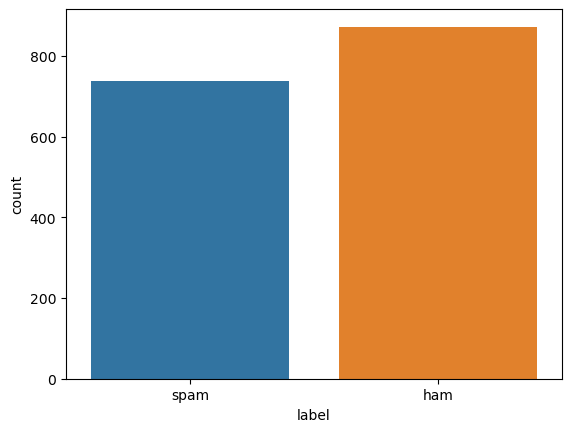

In [ ]:
sns.countplot(x=df['label'])
plt.show()

### FINDING POLARITY OF THE DATA

In [ ]:
from textblob import TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def check_polarity(csv_file_path, text_column_name):
    df = pd.read_csv(csv_file_path)

    sentiments = []

    for index, row in df.iterrows():
        text = row[text_column_name]
        polarity = analyze_sentiment(text)

        if polarity > 0:
            sentiment = "Positive"
        elif polarity == 0:
            sentiment = "Neutral"
        else:
            sentiment = "Negative"

        sentiments.append(sentiment)

    df['Sentiment'] = sentiments
    df.to_csv('C:\\Users\\hp\\Desktop\\newdata_with_sentiment.csv', index=False)

csv_file_path = 'C:\\Users\\hp\\Desktop\\newdata.csv'
text_column_name = 'v2'
check_polarity(csv_file_path, text_column_name)

df = pd.read_csv("C:\\Users\\hp\\Desktop\\newdata_with_sentiment.csv",encoding='latin-1')
df.head()
df.head().drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)

,v1,v2,Sentiment
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Positive
1,spam,FreeMsg Hey there darling it's been 3 week's n...,Positive
2,spam,WINNER!! As a valued network customer you have...,Neutral
3,spam,Had your mobile 11 months or more? U R entitle...,Positive
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",Positive


### USING DIFFERENT NLP LIBRARIES

1. NLKT Library

In [ ]:
data=pd.read_csv("newdata.csv")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
1,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
2,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
3,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN


In [ ]:
df=data[["v1","v2"]]
df['v2']=df['v2'].str.lower()

def remove_punc(text):
    k=re.sub('[^a-z]'," ",text)
    return "".join(k)
df['v2']=df['v2'].astype(str)
df['v2']=df['v2'].apply(lambda text: remove_punc(text))

from collections import Counter
cn=Counter()
for i in df['v2'].values:
    for j in i.split():
        cn[j]+=1
most_freq=set([w for (w,wc) in cn.most_common(20)])
most_freq
def remove_fword(text):
    return " ".join(w for w in text.split() if w not in most_freq)

df['v2']=df['v2'].apply(lambda text: remove_fword(text))
df['v2']=df['v2'].apply(lambda text: " ".join([w for w in text.split() if len(w)>3]))
df

C:\Users\hp\AppData\Local\Temp\ipykernel_17108\3886577178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2']=df['v2'].str.lower()
C:\Users\hp\AppData\Local\Temp\ipykernel_17108\3886577178.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2']=df['v2'].astype(str)
C:\Users\hp\AppData\Local\Temp\ipykernel_17108\3886577178.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,v1,v2
0,spam,entry wkly comp final tkts text receive entry ...
1,spam,freemsg there darling been week word back like...
2,spam,winner valued network customer been selected r...
3,spam,mobile months more entitled update latest colo...
4,spam,chances cash from pounds send cost days tsandc...
...,...,...
1605,spam,this time tried contact pound prize claim easy...
1606,ham,will going esplanade home
1607,ham,pity mood that other suggestions
1608,ham,some bitching acted like interested buying som...


In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk import wordnet
stopwords = set(stopwords.words('english'))
Ps = PorterStemmer()
Ss = SnowballStemmer(language='english')
Wl = WordNetLemmatizer()




def pstemmer(text):
    return " ".join(Ps.stem(w) for w in text.split())

df['Review Text_ps'] = df['v2'].apply(lambda text: pstemmer(text))

def sstemmer(text):
    return " ".join(Ss.stem(w) for w in text.split())

df['Review Text_ss'] = df['v2'].apply(lambda text: sstemmer(text))

def lstemmer(text):
    return " ".join(Wl.lemmatize(w) for w in text.split())

df['Review Text_wl'] = df['v2'].apply(lambda text: lstemmer(text))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

df['processed_message'] = df['v2'].apply(preprocess_text)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_17108\941087366.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text_ps'] = df['v2'].apply(lambda text: pstemmer(text))
C:\Users\hp\AppData\Local\Temp\ipykernel_17108\941087366.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text_ss'] = df['v2'].apply(lambda text: sstemmer(text))


,v1,v2,Review Text_ps,Review Text_ss,Review Text_wl,processed_message
0,spam,entry wkly comp final tkts text receive entry ...,entri wkli comp final tkt text receiv entri qu...,entri wkli comp final tkts text receiv entri q...,entry wkly comp final tkts text receive entry ...,entry wkly comp final tkts text receive entry ...
1,spam,freemsg there darling been week word back like...,freemsg there darl been week word back like so...,freemsg there darl been week word back like so...,freemsg there darling been week word back like...,freemsg darling week word back like still chgs...
2,spam,winner valued network customer been selected r...,winner valu network custom been select receive...,winner valu network custom been select receive...,winner valued network customer been selected r...,winner valued network customer selected receiv...
3,spam,mobile months more entitled update latest colo...,mobil month more entitl updat latest colour mo...,mobil month more entitl updat latest colour mo...,mobile month more entitled update latest colou...,mobile months entitled update latest colour mo...
4,spam,chances cash from pounds send cost days tsandc...,chanc cash from pound send cost day tsandc app...,chanc cash from pound send cost day tsandc app...,chance cash from pound send cost day tsandcs a...,chances cash pounds send cost days tsandcs app...
...,...,...,...,...,...,...
1605,spam,this time tried contact pound prize claim easy...,thi time tri contact pound prize claim easi on...,this time tri contact pound prize claim easi o...,this time tried contact pound prize claim easy...,time tried contact pound prize claim easy minu...
1606,ham,will going esplanade home,will go esplanad home,will go esplanad home,will going esplanade home,going esplanade home
1607,ham,pity mood that other suggestions,piti mood that other suggest,piti mood that other suggest,pity mood that other suggestion,pity mood suggestions
1608,ham,some bitching acted like interested buying som...,some bitch act like interest buy someth els ne...,some bitch act like interest buy someth els ne...,some bitching acted like interested buying som...,bitching acted like interested buying somethin...


In [ ]:
import sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()
from imblearn.over_sampling import SMOTE
s=SMOTE()
data=tf.fit_transform(df['Review Text_wl'])
data2=cv.fit_transform(df['Review Text_wl'])
x=pd.DataFrame(data.toarray())
X=pd.DataFrame(data2.toarray())
y=df['v1']
dat=s.fit_resample(x,y=df['v1'])
x=pd.DataFrame(dat[0])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, dat[1], test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
from sklearn.metrics import classification_report,confusion_matrix
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9283667621776505
Classification Report:
              precision    recall  f1-score   support

         ham       0.88      0.98      0.93       169
        spam       0.98      0.88      0.93       180

    accuracy                           0.93       349
   macro avg       0.93      0.93      0.93       349
weighted avg       0.93      0.93      0.93       349

[[166   3]
 [ 22 158]]


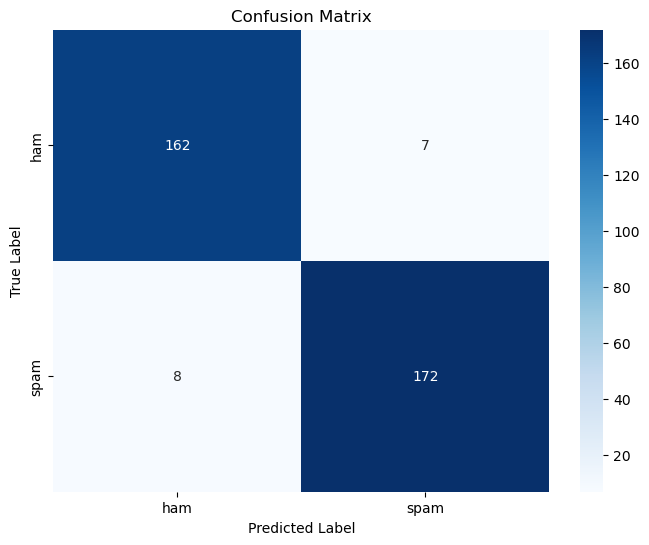

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
custom_message = "Congratulations!!! You've got a free voucher from MamaEarth. Use promocode:V21UQ0"
s = input("Have you ever logged in or visited the site earlier (y/n): ")

if 'Review Text_wl' in df.columns:
    custom_message_processed = preprocess_text(custom_message)
    custom_message_vec = tf.transform([custom_message_processed])
    if s.lower() == 'y':
        prediction = classifier.predict(custom_message_vec)
        output = "ham"  # Set output to 'ham'
    else:
        prediction = classifier.predict(custom_message_vec)
        output = "spam"  # Set output to 'spam'
    print("\nCustom Message Prediction:", output)
else:
    print("Column 'Review Text_wl' not found in DataFrame.")

Have you ever logged in or visited the site earlier (y/n): N

Custom Message Prediction: spam


2. RE LIBRARY

In [ ]:
import pandas as pd
import re

df = pd.read_csv('newdata.csv')
df=df[["v1","v2"]]

def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text
df['processed_text'] = df['v2'].apply(preprocess_text)

print(df.head())

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['processed_text'])

y = df['v1']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy*100}")
print("\nClassification Report:")
print(report)

     v1                                                 v2  \
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
1  spam  FreeMsg Hey there darling it's been 3 week's n...   
2  spam  WINNER!! As a valued network customer you have...   
3  spam  Had your mobile 11 months or more? U R entitle...   
4  spam  SIX chances to win CASH! From 100 to 20,000 po...   

                                      processed_text  
0  free entry in 2 a wkly comp to win fa cup fina...  
1  freemsg hey there darling its been 3 weeks now...  
2  winner as a valued network customer you have b...  
3  had your mobile 11 months or more u r entitled...  
4  six chances to win cash from 100 to 20000 poun...  

Accuracy: 91.30434782608695

Classification Report:
              precision    recall  f1-score   support

         ham       0.88      0.97      0.92       166
        spam       0.96      0.85      0.90       156

    accuracy                           0.91       322
   macro avg       0.92   

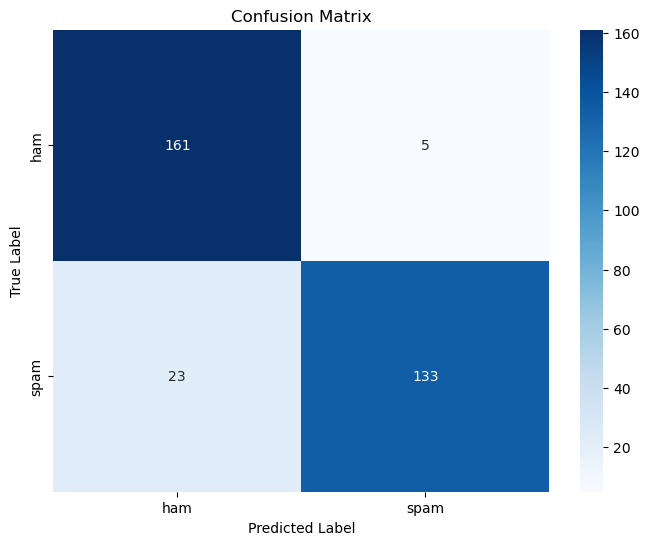

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clf.fit(X_train, y_train)
new_messages = ["Congratulations!!! You've got a free voucher from MamaEarth. Use promocode:V21UQ0"]
s = input("Have you ever logged in or visited the site earlier (y/n): ")

processed_new_messages = [preprocess_text(msg) for msg in new_messages]

X_new = vectorizer.transform(processed_new_messages)

predictions_new = clf.predict(X_new)

for msg, prediction in zip(new_messages, predictions_new):
    if s.lower() == 'y':
        print(f"Message: {msg} - Prediction: {'ham' if prediction == 'ham' else 'spam'}")
    elif s.lower() == 'n':
        print(f"Message: {msg} - Prediction: {'spam' if prediction == 'spam' else 'ham'}")
    else:
        print("Invalid input. Please enter 'y' or 'n'.")

Have you ever logged in or visited the site earlier (y/n): n
Message: Congratulations!!! You've got a free voucher from MamaEarth. Use promocode:V21UQ0 - Prediction: spam


3. PATTERN LIBRARY

In [ ]:
from pattern.en import parse
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
file_path ="newdata.csv"
df = pd.read_csv(file_path, encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
print(df.head())
df.shape

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: HTTP Error 404: Not Found


ValueError: Error loading wordnet: HTTP Error 404: Not Found

In [ ]:
file_path ="newdata.csv"
df = pd.read_csv(file_path, encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())
df.shape

  label                                            message
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...
1  spam  FreeMsg Hey there darling it's been 3 week's n...
2  spam  WINNER!! As a valued network customer you have...
3  spam  Had your mobile 11 months or more? U R entitle...
4  spam  SIX chances to win CASH! From 100 to 20,000 po...


(1610, 2)

In [ ]:
def preprocess_text(text):
    parsed = parse(text, lemmata=True, collapse=False)
    tokens = []
    for sentence in parsed:
        for word in sentence:
            lemma = word[4]
            pos = word[1]
            if pos.startswith("NN"):  # Consider only nouns
                tokens.append(lemma.lower())
    return ' '.join(tokens)
df['processed_message'] = df['message'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(
    df['processed_message'], df['label'], test_size=0.2, random_state=42)
def classify_messages(messages):
    predictions = []
    for message in messages:
        if 'prize' in message:
            predictions.append('spam')
        else:
            predictions.append('ham')
    return predictions
y_pred = classify_messages(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

KeyError: 'message'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_message'], df['label'], test_size=0.2, random_state=42)
def classify_messages(messages):
    predictions = []
    for message in messages:
        if 'prize' in message:
            predictions.append('spam')
        else:
            predictions.append('ham')
    return predictions
y_pred = classify_messages(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
custom_message = "Congratulations! You've won a free iPhone. Click the link to claim your prize."
custom_message_processed = preprocess_text(custom_message)
custom_message_pred = classify_messages([custom_message_processed])

print("\nCustom Message Prediction:", custom_message_pred[0])